In [1]:
import numpy as np
import pandas as pd
import math 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Create 3 sets of fake data.
##### 1. Complete random
##### 2. sin(x)
##### 3. sort of straight increasing line.
##### 4. Data with two circular groups

In [2]:
#1. Complete random data
xval = range(0,1000)
yval = []
for i in range(0,1000):
    yval.append(np.random.randint(0,100))

In [3]:
df1 = pd.DataFrame({"x":xval, "y":yval})

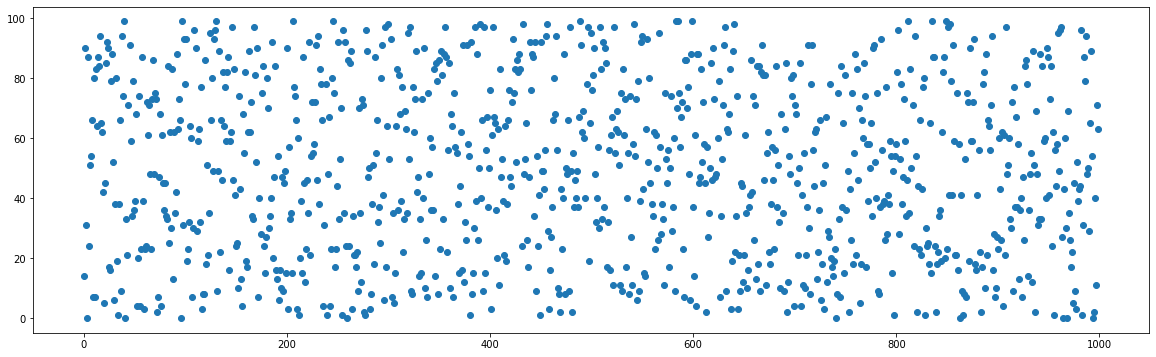

In [4]:
fig = plt.figure(figsize=(20,6))
plt.scatter(df1["x"], df1["y"])

In [5]:
#2. sin(x)
yval = []
for i in range(0,1000):
    yval.append(math.sin(0.01 * i))
df2 = pd.DataFrame({"x":xval, "y":yval})

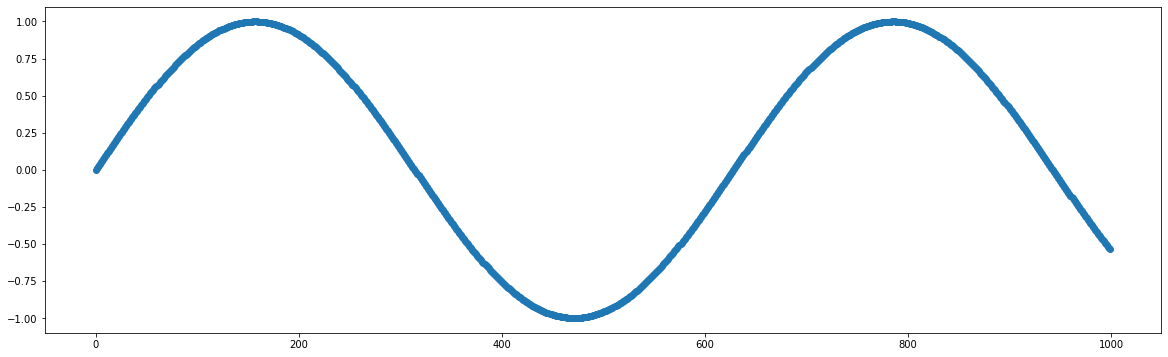

In [6]:
fig = plt.figure(figsize=(20,6))
plt.scatter(df2["x"], df2["y"])

In [7]:
#3. sort of linear
xval = range(0,100)
yval = []
curr = 1.0
for i in range(0,100):
    next = curr * (np.random.randint(9, 13)/ 10)
    yval.append(next)
    curr = next
df3 = pd.DataFrame({"x":xval, "y":yval})

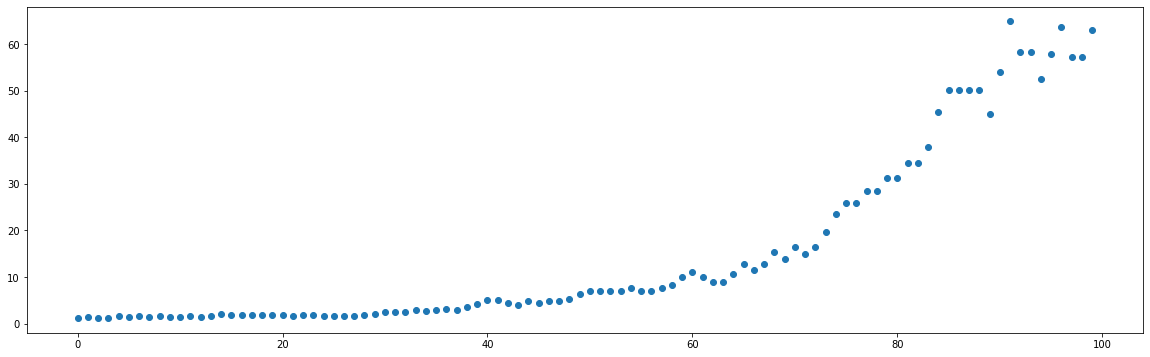

In [8]:
fig = plt.figure(figsize=(20,6))
plt.scatter(df3["x"], df3["y"])

In [9]:
#4. Two circular groups
xval = []
yval = []
radius = 25
for i in range(0,1000):
    group = np.random.choice((1,3))
    xsign = np.random.choice((-1,1))
    ysign = np.random.choice((-1,1))
    xlen = np.random.random() * radius*0.75 * xsign
    ylen = np.random.random() * radius*0.75 * ysign
    xval.append((radius * group) + xlen)
    yval.append(radius + ylen)
df4 = pd.DataFrame({"x":xval, "y":yval})

In [10]:
np.random.choice((-1,1))

-1

In [11]:
df4.head()

,x,y
0,33.375869,41.870096
1,87.622327,38.614930
2,20.569591,21.516132
3,64.450525,27.943024
4,89.186030,10.349452


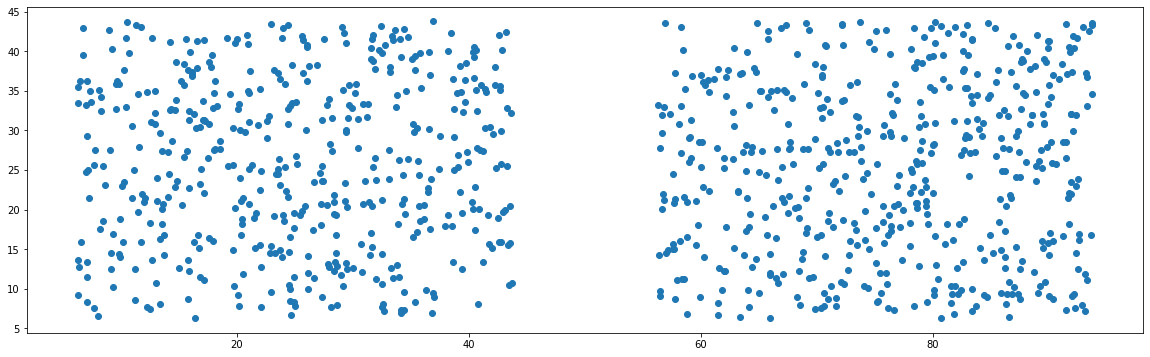

In [12]:
fig = plt.figure(figsize=(20,6))
plt.scatter(df4["x"], df4["y"])

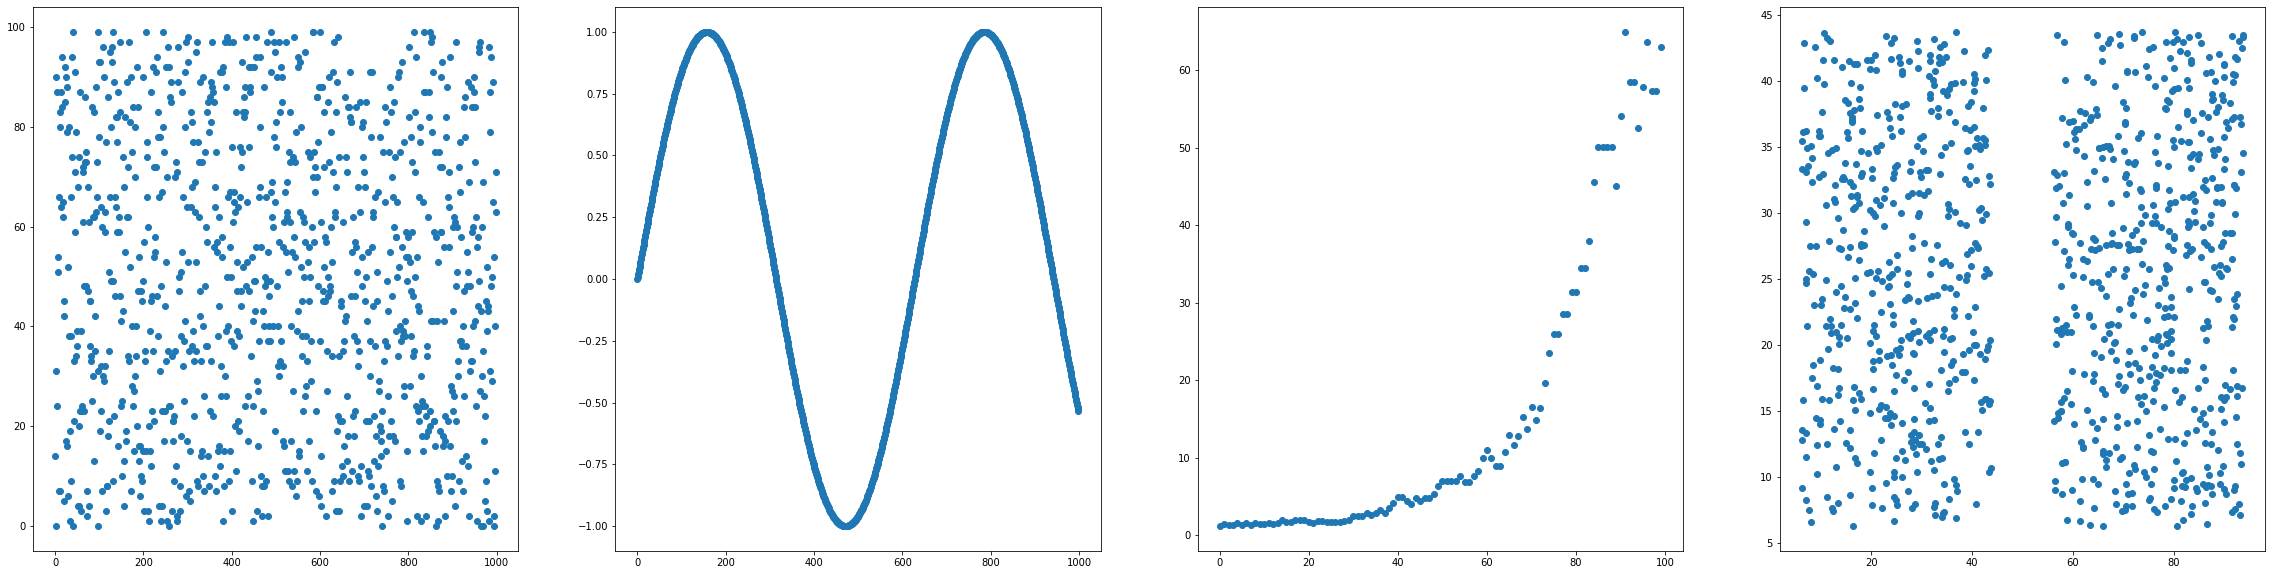

In [13]:
#Plotting them all next to each other as subplots so it's easier to see.
rowCount = 1
colCount = 4
fig, axs = plt.subplots(rowCount, colCount, figsize=(40,10))
# fig.subplots_adjust(hspace=0.4,wspace=0.2)

axs[0].scatter(df1["x"], df1["y"])
axs[1].scatter(df2["x"], df2["y"])
axs[2].scatter(df3["x"], df3["y"])
axs[3].scatter(df4["x"], df4["y"])
# for i in range(0,rowCount):
#     for j in range(0,colCount):
#         axs[i, j].plot(df["ID"],df["Column A"], label = "Stuff")
#         axs[i, j].tick_params(labelrotation=90)
#         axs[i, j].set_title("Chart " + str(i) + ", " + str(j))
#         axs[i, j].set_xlabel("This is my X axis", fontsize=10)
#         axs[i, j].set_ylabel("This is my Y axis", fontsize=10)
#         axs[i, j].legend()

plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
def perform_kmeans(n_clusters,data):
    # defining the kmeans function with initialization as k-means++
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    # fitting the k means algorithm on scaled data
    kmeans.fit(data)
    return kmeans

In [16]:
frames = []
for df in [df1, df2, df3, df4]:
    model = perform_kmeans(n_clusters=2,data = df)
    pred = model.predict(df)
    frame = pd.DataFrame(df)
    frame['cluster'] = pred
    frame['cluster'].value_counts()
    frames.append(frame)

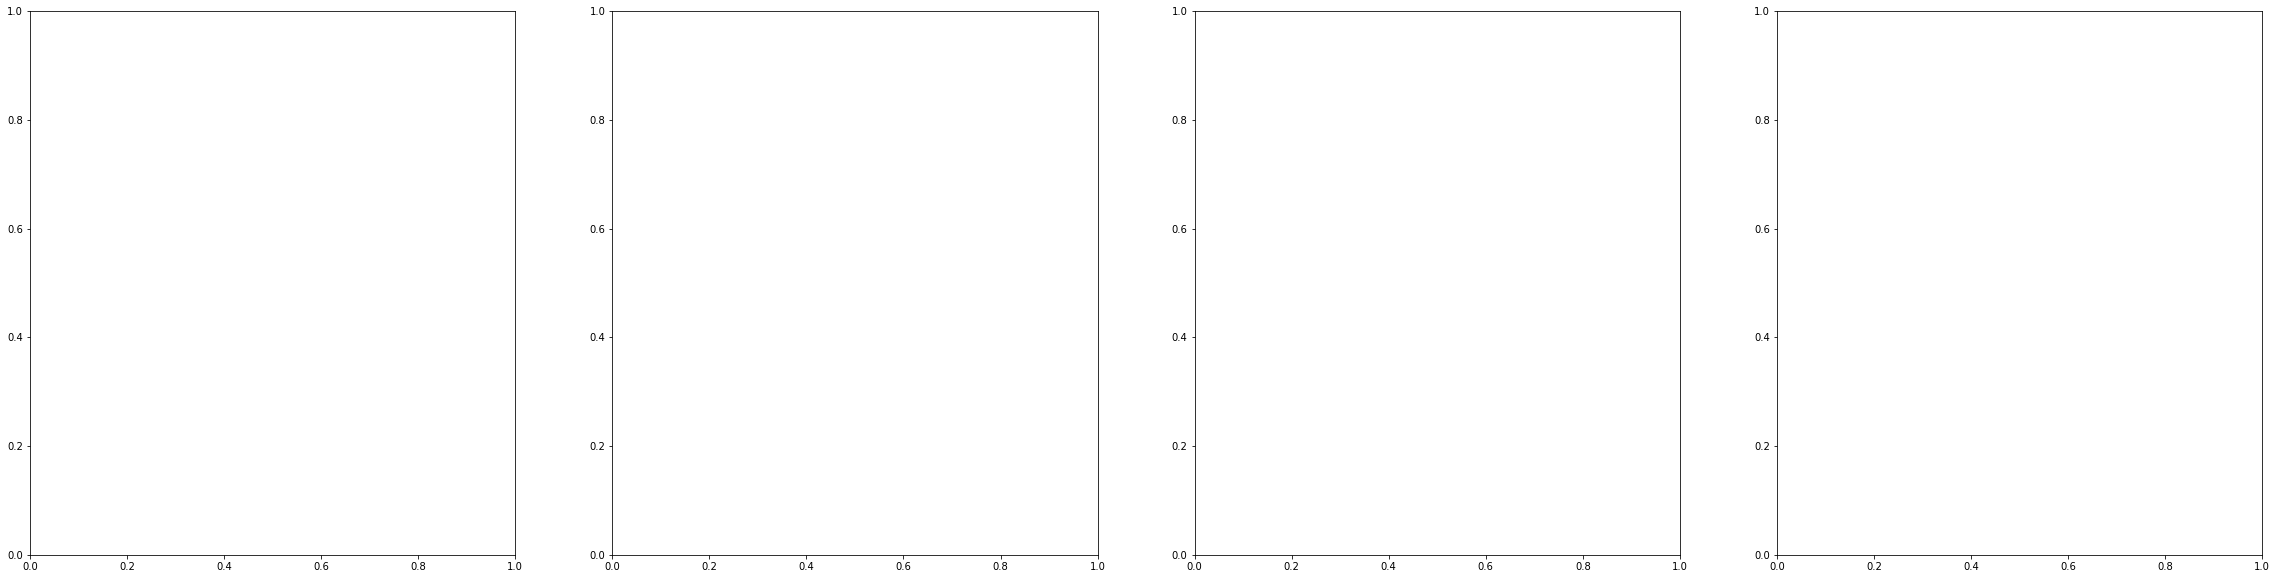

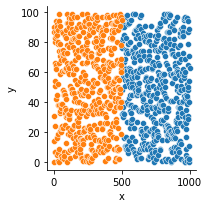

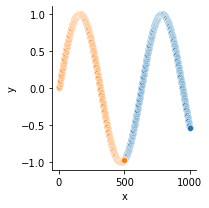

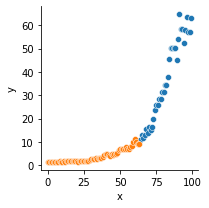

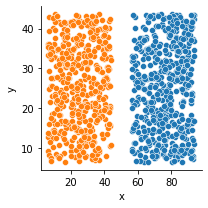

In [17]:
rowCount = 1
colCount = 4
fig, axs = plt.subplots(rowCount, colCount, figsize=(40,10))
# fig.subplots_adjust(hspace=0.4,wspace=0.2)

g1 = sns.FacetGrid(frames[0], hue="cluster")
g1.map(sns.scatterplot, "x", "y", ax=axs[0])

g2 = sns.FacetGrid(frames[1], hue="cluster")
g2.map(sns.scatterplot, "x", "y", ax=axs[1])

g3 = sns.FacetGrid(frames[2], hue="cluster")
g3.map(sns.scatterplot, "x", "y", ax=axs[2])

g4 = sns.FacetGrid(frames[3], hue="cluster")
g4.map(sns.scatterplot, "x", "y", ax=axs[3])

plt.show()


In [18]:
frames = []
for df in [df1, df2, df3, df4]:
    model = perform_kmeans(n_clusters=5,data = df)
    pred = model.predict(df)
    frame = pd.DataFrame(df)
    frame['cluster'] = pred
    frame['cluster'].value_counts()
    frames.append(frame)

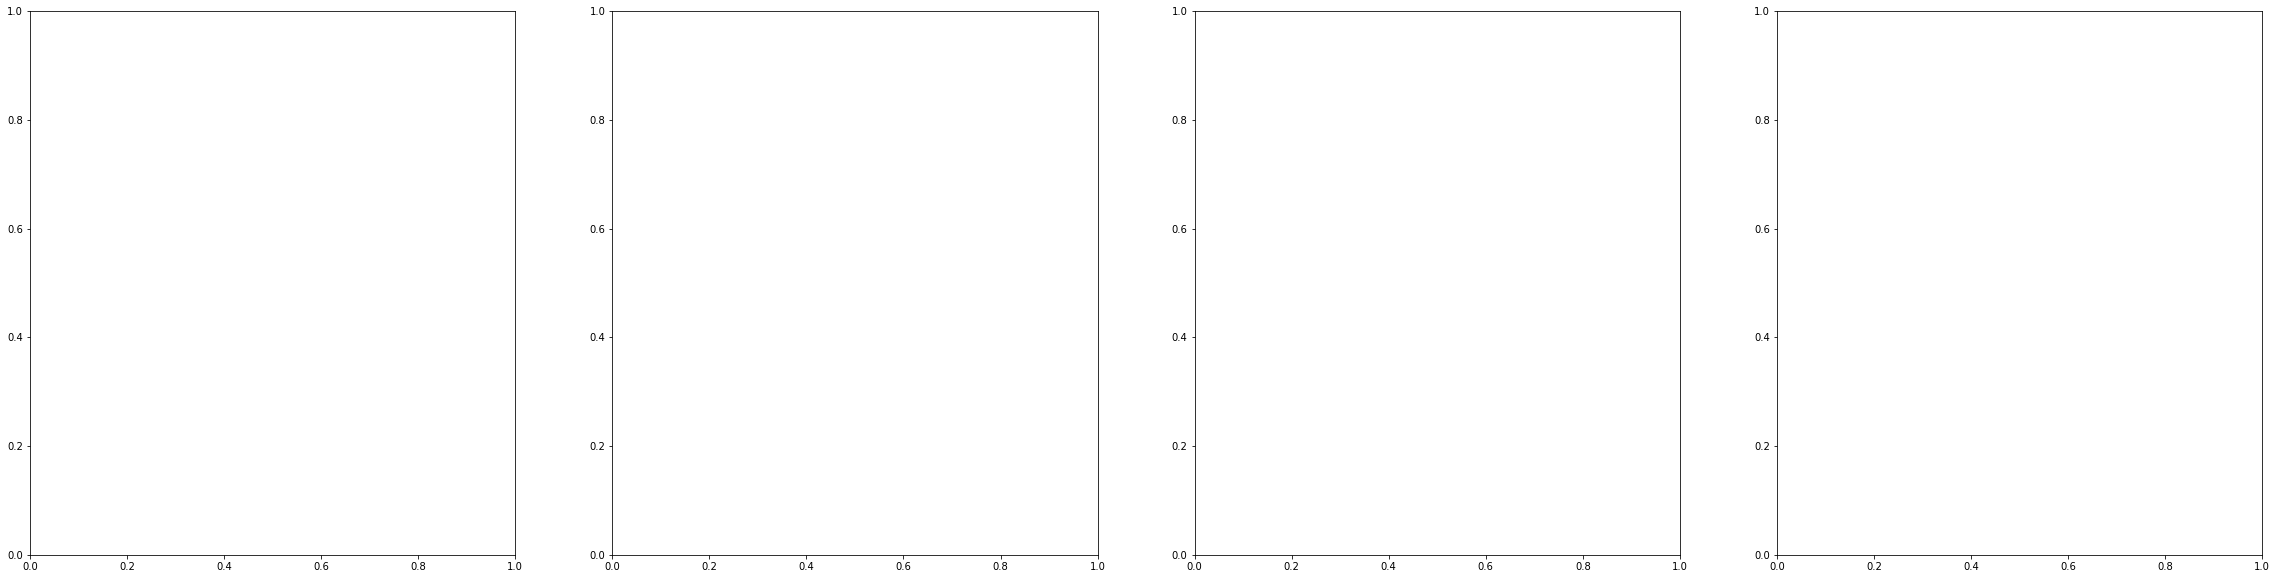

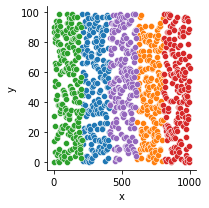

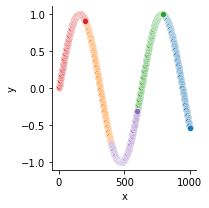

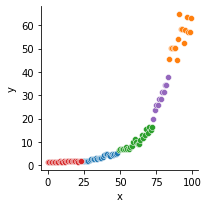

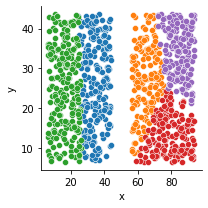

In [19]:
rowCount = 1
colCount = 4
fig, axs = plt.subplots(rowCount, colCount, figsize=(40,10))
# fig.subplots_adjust(hspace=0.4,wspace=0.2)

g1 = sns.FacetGrid(frames[0], hue="cluster")
g1.map(sns.scatterplot, "x", "y", ax=axs[0])

g2 = sns.FacetGrid(frames[1], hue="cluster")
g2.map(sns.scatterplot, "x", "y", ax=axs[1])

g3 = sns.FacetGrid(frames[2], hue="cluster")
g3.map(sns.scatterplot, "x", "y", ax=axs[2])

g4 = sns.FacetGrid(frames[3], hue="cluster")
g4.map(sns.scatterplot, "x", "y", ax=axs[3])

plt.show()